In [673]:
import numpy as np
import pandas as pd
import seaborn as sns
my_cols = ["Water Level(m)","Temperature(C)","Strain(micro-strain)"]
data = pd.read_csv('Water_Temp_Strain.txt',names=my_cols,delimiter='\t')

In [674]:
data_matrix = np.array(data[['Water Level(m)','Temperature(C)']].values,'float')
beta_vector = np.ones(3651)
alpha_vector = np.arange(0,3651,1)*144
A_matrix = np.column_stack((alpha_vector,beta_vector,data_matrix))
A_matrix.reshape(3651,4)
pseudo_inverse_A_Matrix = np.linalg.pinv(A_matrix)

In [675]:
y_vector = np.array(data['Strain(micro-strain)'].values,'float')

In [676]:
W_Matrix = np.matmul(pseudo_inverse_A_Matrix,y_vector)

In [677]:
print('Alpha=',W_Matrix[0],' micro-strain/min')
print('Beta=',W_Matrix[1],'micro-strain')
print('Gamma=',W_Matrix[3],'micro-strains/meter')
print('Delta=',W_Matrix[2],'micro-strains/Celsius')

Alpha= -0.00042984263809532115  micro-strain/min
Beta= -439.50238120742614 micro-strain
Gamma= 1.4432743355313284 micro-strains/meter
Delta= -53.15723364050697 micro-strains/Celsius


(b)

In [678]:
q_3000 = W_Matrix[0]*2999*144+W_Matrix[1]
print('q_3000 =',q_3000, 'micro-strain')

q_3000 = -625.1325035247191 micro-strain


(c)

In [679]:
q_5y = W_Matrix[0]*5*365*24*60+W_Matrix[1]
print('q_5y=',q_5y, 'micro-strain')

q_5y= -1569.1288341219304 micro-strain


(d)

In [680]:
# y is the predcition afer linear regression
y = np.matmul(A_matrix,W_Matrix)
residual = data['Strain(micro-strain)']-y

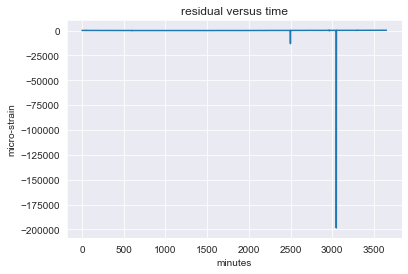

In [682]:
residual_plot = sns.lineplot(data = residual)
sns.set_style("darkgrid")
residual_plot.set_xlabel("minutes")
residual_plot.set_ylabel("micro-strain")
residual_plot.set_title("residual versus time")
residual_plot.figure.savefig("residual versus time")

In [684]:
print('The mean of the residual =',residual.mean())
residual_mean = residual.mean()
print('The std of the residual =',residual.std())
residual_std = residual.std()

The mean of the residual = 1.6778227974623325e-12
The std of the residual = 3293.952960065999


(e)

In [688]:
import numpy as np
import pandas as pd

import seaborn as sns
my_cols = ["Water Level(m)","Temperature(C)","Strain(micro-strain)"]
data = pd.read_csv('Water_Temp_Strain.txt',names=my_cols,delimiter='\t')

In [689]:
data

,Water Level(m),Temperature(C),Strain(micro-strain)
0,-7.317645,0.372449,16.774547
1,-7.232018,-0.754370,19.498479
2,-6.477226,1.109975,49.871754
3,-7.146589,1.569678,28.395637
4,-7.253274,4.265809,10.035322
5,-7.437194,-1.338259,5.510556
6,-6.634188,-3.529099,-8.194726
7,-7.171574,-1.887858,18.841803
8,-6.869299,-1.357767,4.108691
9,-6.764518,-1.206965,20.304607


In [687]:
# iterate the process
outlier_exist = True
drop_index_total=[]
while outlier_exist:
    number_of_rows = len(data)
    # build A_matrix for linear regression
    data_matrix = np.array(data[['Water Level(m)','Temperature(C)']].values,'float')
    beta_vector = np.ones(number_of_rows)
    alpha_vector = np.arange(0,number_of_rows,1)*144
    A_matrix = np.column_stack((alpha_vector,beta_vector,data_matrix))
    A_matrix.reshape(number_of_rows,4)  
    # find the psuedo inverse of A_matrix
    pseudo_inverse_A_Matrix = np.linalg.pinv(A_matrix)    
    # find the y vector
    y_vector = np.array(data['Strain(micro-strain)'].values,'float')    
    # calculate the parameters for linear regression
    W_Matrix = np.matmul(pseudo_inverse_A_Matrix,y_vector)    
    # predict y 
    y = np.matmul(A_matrix,W_Matrix)  
    # calculate residuals
    residual = data['Strain(micro-strain)']-y
    # mean and std of residuals
    print('The mean of the residual = ',residual.mean())
    residual_mean = residual.mean()
    print('The std of the residual = ',residual.std())
    residual_std = residual.std()   
    # find the index with outlier datapoints and store it in drop_index[]
    drop_index = []
    threshold_high = residual_mean+3*residual_std
    threshold_low = residual_mean-3*residual_std
    for i in range(0,number_of_rows):
        if i in drop_index_total:
            continue
        if residual[i] > thres_hold_high or residual[i] < threshold_low:
            drop_index.append(i)
    #keep track of all the index dropped throught the iteration       
    for i in range(0,len(drop_index)):
        drop_index_total.append(drop_index[i])
        print('The water level:',data['Water Level(m)'][drop_index[i]],
              ',the Temperature:',data['Temperature(C)'][drop_index[i]],',the row is:',drop_index[i])  
    #data set drop index  
    data.drop(drop_index,inplace=True)
    print('-----------------------------------------------------')
    #if no more outliers than exit the iteration
    if not drop_index:
        print('no more outliers')
        outlier_exist = False

The mean of the residual =  1.6778227974623325e-12
The std of the residual =  3293.952960065999
The water level: -9.54688299960992 ,the Temperature: 4.17978837213146 ,the row is: 2499
The water level: -8.37139121446426 ,the Temperature: 2.10399519785036 ,the row is: 3049
-----------------------------------------------------
The mean of the residual =  -5.787398817541758e-14
The std of the residual =  14.009994054339375
The water level: -10.1939760133644 ,the Temperature: 10.5216587260785 ,the row is: 598
The water level: -10.2119567730395 ,the Temperature: 10.8844563878947 ,the row is: 2199
The water level: -9.8411652681218 ,the Temperature: 2.07317374340667 ,the row is: 2959
The water level: -9.08461406356181 ,the Temperature: 1.39630567837468 ,the row is: 2969
The water level: -8.68034346724605 ,the Temperature: -1.51614060916072 ,the row is: 3199
The water level: -8.75525517694182 ,the Temperature: 1.06486125085496 ,the row is: 3299
--------------------------------------------------

In [657]:
type(data['Water Level(m)'][1])

numpy.float64

In [690]:
print('Alpha=',W_Matrix[0],' micro-strain/min')
print('Beta=',W_Matrix[1],'micro-strain')
print('Gamma=',W_Matrix[3],'micro-strains/Celsius')
print('Delta=',W_Matrix[2],'micro-strains/meter')

Alpha= -3.99452445236156e-05  micro-strain/min
Beta= 12.8355141371718 micro-strain
Gamma= 1.5261812447776726 micro-strains/Celsius
Delta= -0.958624064677513 micro-strains/meter


(f)

In [691]:
q_3000 = W_Matrix[0]*2999*144+W_Matrix[1]
print('q_3000 =',q_3000, 'micro-strain')
q_5y = W_Matrix[0]*5*365*24*60+W_Matrix[1]
print('q_5y=',q_5y, 'micro-strain')

q_3000 = -4.415079381818739 micro-strain
q_5y= -92.14058847089 micro-strain


(g)

In [692]:
#----------------------------(g)-------------------------
import numpy as np
import pandas as pd
import seaborn as sns
my_cols = ["Water Level(m)","Temperature(C)","Strain(micro-strain)"]
data = pd.read_csv('Water_Temp_Strain.txt',names=my_cols,delimiter='\t')

In [693]:
# iterate the process
outlier_exist = True
drop_index_total=[]
while outlier_exist:
    number_of_rows = len(data)
    # build A_matrix for linear regression
    data_matrix = np.array(data['Water Level(m)'].values,'float')
    beta_vector = np.ones(number_of_rows)
    alpha_vector = np.arange(0,number_of_rows,1)*144
    A_matrix = np.column_stack((alpha_vector,beta_vector,data_matrix))
    A_matrix.reshape(number_of_rows,3)   
    # find the psuedo inverse of A_matrix
    pseudo_inverse_A_Matrix = np.linalg.pinv(A_matrix)    
    # find the y vector
    y_vector = np.array(data['Strain(micro-strain)'].values,'float')    
    # calculate the parameters for linear regression
    W_Matrix = np.matmul(pseudo_inverse_A_Matrix,y_vector)
    # predict y 
    y = np.matmul(A_matrix,W_Matrix)   
    # calculate residuals
    residual = data['Strain(micro-strain)']-y
    # mean and std of residuals
    print('The mean of the residual = ',residual.mean())
    residual_mean = residual.mean()
    print('The std of the residual = ',residual.std())
    residual_std = residual.std() 
    # find the index with outlier datapoints and store it in drop_index[]
    drop_index = []
    threshold_high = residual_mean+3*residual_std
    threshold_low = residual_mean-3*residual_std
    for i in range(0,number_of_rows):
        if i in drop_index_total:
            continue
        if residual[i] > thres_hold_high or residual[i] < threshold_low:
            drop_index.append(i)   
    #data set drop index  
    data.drop(drop_index,inplace=True)      
    #keep track of all the index dropped throught the iteration       
    for i in range(0,len(drop_index)):
        drop_index_total.append(drop_index[i])
        print('The value dropped is:', residual[drop_index[i]],',the index is:',drop_index[i])
    print('-----------------------------------------------------')
    #if no more outliers than exit the iteration
    if not drop_index:
        print('no more outliers')
        outlier_exist = False
    

The mean of the residual =  -2.5795826621849085e-08
The std of the residual =  3293.9609180648285
The value dropped is: -13177.607867466333 ,the index is: 2499
The value dropped is: -198470.01454787224 ,the index is: 3049
-----------------------------------------------------
The mean of the residual =  -1.1092069189638664e-08
The std of the residual =  16.083448333599126
The value dropped is: -59.02046624225574 ,the index is: 598
The value dropped is: -48.29325845474871 ,the index is: 1419
The value dropped is: -111.86316957453347 ,the index is: 2199
The value dropped is: -180.05040394955753 ,the index is: 2959
The value dropped is: -262.91650645563846 ,the index is: 2969
The value dropped is: -57.51665958100852 ,the index is: 3199
The value dropped is: -206.24228096871593 ,the index is: 3299
-----------------------------------------------------
The mean of the residual =  -1.1108775449583841e-08
The std of the residual =  14.612201488199771
The value dropped is: -46.0054143939304 ,the

In [694]:
W_Matrix
print('Alpha=',W_Matrix[0],' micro-strain/min')
print('Beta=',W_Matrix[1],'micro-strain')
print('Delta=',W_Matrix[2],'micro-strains/meter')
q_3000 = W_Matrix[0]*2999*144+W_Matrix[1]
print('q_3000 =',q_3000, 'micro-strain')
q_5y = W_Matrix[0]*5*365*24*60+W_Matrix[1]
print('q_5y=',q_5y, 'micro-strain')

Alpha= -8.044421308508439e-05  micro-strain/min
Beta= -37.65036760882104 micro-strain
Delta= -9.409107442878295 micro-strains/meter
q_3000 = -72.39068369489326 micro-strain
q_5y= -249.05775959642278 micro-strain
